<a id="toc"></a>

## <p style="background-color:#c0ff3e; font-family:newtimeroman; color:#2D2727; font-size:150%; text-align:center; border-radius:10px 10px;">PYTHON TRANSACTION DATA PROJECT</p>



# Dataset Description

This dataset contains transaction data that occurred between 2010 and 2011. The dataset is from a store based in the United Kingdom and is registered there. Below are details about the columns in the dataset.

## Column Information

- **InvoiceNo:** Invoice number. A unique 6-digit integer assigned to each transaction.
- **StockCode:** Product code. A unique 5-digit integer assigned to each different product.
- **Description:** Product name.
- **Quantity:** The quantity of each product (item) per transaction. Numerical data.
- **InvoiceDate:** Invoice date and time. Numerical data representing the day and time each transaction was created.
- **UnitPrice:** Unit price. Numerical data, the price per unit of the product in pounds.
- **CustomerID:** Customer number. A unique 5-digit integer assigned to each customer.
- **Country:** Country name. The name of the country where each customer resides.

## Data Source

This dataset is provided by a store based in the United Kingdom and includes transactions that occurred between 2010 and 2011. It represents international transactions for the company primarily engaged in selling gifts.


In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

In [2]:
df= pd.read_csv("vam2proje.csv", encoding= 'unicode_escape')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [3]:
# any duplicated values ?

In [4]:
df.duplicated().value_counts()

False    536641
True       5268
dtype: int64

In [5]:
# delete duplicates

In [6]:
df.drop_duplicates(keep="first", inplace= True)

In [7]:
# let's check

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  535187 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


In [9]:
# First rows

In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [11]:
# rows and columns

In [12]:
rows, columns = df.shape
print(f"# of rows: {rows},  # of columns: {columns}")

# of rows: 536641,  # of columns: 8


In [13]:
#   # of unique products 

In [14]:
df.StockCode.nunique()

4070

In [15]:
#   quantities sold per product

In [16]:
df.groupby(["StockCode"])[["Quantity"]].sum()

,Quantity
StockCode,
10002,1037
10080,495
10120,192
10123C,-13
10123G,-38
...,...
gift_0001_20,20
gift_0001_30,37
gift_0001_40,3


In [17]:
# there are negative numbers and stock codes like 'm', let's check it later

In [18]:
# average prices of products

In [19]:
df.groupby(["StockCode"])[["UnitPrice"]].mean()

,UnitPrice
StockCode,
10002,1.056849
10080,0.376667
10120,0.210000
10123C,0.487500
10123G,0.000000
...,...
gift_0001_20,15.038000
gift_0001_30,21.941250
gift_0001_40,33.566667


In [20]:
# average price for all products

In [21]:
df.groupby(["StockCode"])[["UnitPrice"]].mean().mean()

UnitPrice    4.934629
dtype: float64

In [22]:
# product with the max unit price

In [23]:
df.UnitPrice.max()

38970.0

In [24]:
# that's very high, let's check what it is

In [25]:
df[df.UnitPrice==38970.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,-1,6/10/2011 15:31,38970.0,15098.0,United Kingdom


In [26]:
# there is a problem with this row, let's continue to check

In [27]:
df[df.CustomerID==15098]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222670,556442,22502,PICNIC BASKET WICKER SMALL,60,6/10/2011 15:22,4.95,15098.0,United Kingdom
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,6/10/2011 15:28,649.50,15098.0,United Kingdom
222681,C556445,M,Manual,-1,6/10/2011 15:31,38970.00,15098.0,United Kingdom
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,6/10/2011 15:33,649.50,15098.0,United Kingdom
222692,C556448,22502,PICNIC BASKET WICKER SMALL,-60,6/10/2011 15:39,4.95,15098.0,United Kingdom


In [28]:
# It appears that the 2nd and 3rd lines represent purchases and returns, with 60 purchases and one return.
# This is not a valid unit price. To avoid future issues, this line needs to be corrected. Let's correct it and verify."

In [29]:
df.drop([222680, 222681], axis = 0, inplace= True)

In [30]:
df[df.CustomerID==15098]   

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222670,556442,22502,PICNIC BASKET WICKER SMALL,60,6/10/2011 15:22,4.95,15098.0,United Kingdom
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,6/10/2011 15:33,649.50,15098.0,United Kingdom
222692,C556448,22502,PICNIC BASKET WICKER SMALL,-60,6/10/2011 15:39,4.95,15098.0,United Kingdom


In [31]:
# OK, continue to find the max price product

In [32]:
df.UnitPrice.max()

17836.46

In [33]:
# let's check this product

In [34]:
df[df.UnitPrice==17836.46]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
524602,C580605,AMAZONFEE,AMAZON FEE,-1,12/5/2011 11:36,17836.46,NaN,United Kingdom


In [35]:
# This is a return line, but what is it a return for? Let's create a 'total' column by multiplying the unit price and order quantity. 
# Then, let's try to find the order with a total of 17836.46.

In [36]:
df["total"]= df.UnitPrice*df.Quantity

In [37]:
df[df.total==17836.46]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total


In [38]:
#  So, it seems like it's not a return related to a single order, and since the customer ID is NaN, we can't track it based on that.
# For now, let's continue without deleting it.

In [39]:
df[df.UnitPrice!=17836.46].UnitPrice.max()

16888.02

In [40]:
# find this product

In [41]:
df[df.UnitPrice==16888.02]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
43702,C540117,AMAZONFEE,AMAZON FEE,-1,1/5/2011 9:55,16888.02,NaN,United Kingdom,-16888.02


In [42]:
# this is amazon fee, let's move on from this.

In [43]:
df[df.StockCode!="AMAZONFEE"].UnitPrice.max()

11062.06

In [44]:
# check this

In [45]:
df[df.UnitPrice==11062.06]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
299982,A563185,B,Adjust bad debt,1,8/12/2011 14:50,11062.06,NaN,United Kingdom,11062.06


In [46]:
# let's check stock code 'B'

In [47]:
df[df.StockCode=="B"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
299982,A563185,B,Adjust bad debt,1,8/12/2011 14:50,11062.06,NaN,United Kingdom,11062.06
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom,-11062.06
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom,-11062.06


In [48]:
# that's not the max price product, move on

In [49]:
df[(df.UnitPrice<11062.06)&(df.StockCode!="AMAZONFEE")&(df.StockCode!="B")].UnitPrice.max()

8142.75

In [50]:
# check it

In [51]:
df[df.UnitPrice==8142.75] 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
173277,C551685,POST,POSTAGE,-1,5/3/2011 12:51,8142.75,16029.0,United Kingdom,-8142.75
173382,551697,POST,POSTAGE,1,5/3/2011 13:46,8142.75,16029.0,United Kingdom,8142.75


In [52]:
# seems like an info about carriage, move on

In [53]:
df[(df.UnitPrice<8142.75)&(df.StockCode!="AMAZONFEE")&(df.StockCode!="B")&(df.StockCode!="POST")].UnitPrice.max()

6930.0

In [54]:
df[df.UnitPrice==6930]   

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
173391,C551699,M,Manual,-1,5/3/2011 14:12,6930.0,16029.0,United Kingdom,-6930.0


In [55]:
# also not this one, move on

In [56]:
df[(df.UnitPrice<6930)&(df.StockCode!="AMAZONFEE")&(df.StockCode!="B")&(df.StockCode!="POST")&(df.StockCode!="M")].UnitPrice.max()

4505.17

In [57]:
df[df.UnitPrice==4505.17]   

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
297723,562955,DOT,DOTCOM POSTAGE,1,8/11/2011 10:14,4505.17,NaN,United Kingdom,4505.17


In [58]:
# also not this one, move on
# By the way, if InvoiceNo starts with 'C,' it seems like it's a return. Let's exclude these from the query and continue

In [59]:
df[(df.UnitPrice<4505.17)&(df.StockCode!="AMAZONFEE")&(df.InvoiceNo.str.startswith("C") == False)&(df.Description.str.endswith("POSTAGE")==False)&(df.StockCode!="B")&(df.StockCode!="POST")&(df.StockCode!="M")].UnitPrice.max()

649.5

In [60]:
df[df.UnitPrice==649.5]   

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,6/10/2011 15:33,649.5,15098.0,United Kingdom,649.5


In [61]:
# that seems real, the product with stock code 22502 has the max unit price: 649.5

In [62]:
#  product with the min price

In [63]:
df[df.UnitPrice>0].UnitPrice.min()

0.001

In [64]:
df[df.UnitPrice==0.001]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,4/15/2011 9:27,0.001,13952.0,United Kingdom,0.001
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,7/26/2011 10:13,0.001,15618.0,United Kingdom,0.001
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,9/25/2011 14:58,0.001,16198.0,United Kingdom,0.001
361741,568375,BANK CHARGES,Bank Charges,1,9/26/2011 17:01,0.001,13405.0,United Kingdom,0.001


In [65]:
# When the code is executed, it's seen that there is such a product. However, it doesn't seem logical for a product
# to be sold at this price and in single units, so I'm continuing the investigation. If it were at this price but sold 
# in larger quantities, e.g., a minimum of 100, and no other issues were apparent, it could be acceptable.
# continue to check

In [66]:
df[df.UnitPrice>0.001].UnitPrice.min()

0.01

In [67]:
df[df.UnitPrice==0.01]   

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
108088,C545478,D,Discount,-720,3/3/2011 11:08,0.01,16422.0,United Kingdom,-7.2


In [68]:
# not this one, move on

In [69]:
df[(df.UnitPrice>0.01)&(df.StockCode!="AMAZONFEE")&(df.StockCode!="M")&(df.InvoiceNo.str.startswith("C") == False)].UnitPrice.min()

0.04

In [70]:
df[df.UnitPrice==0.04]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
217060,555876,16045,POPART WOODEN PENCILS ASST,100,6/7/2011 15:28,0.04,15799.0,United Kingdom,4.0
221726,556267,16045,POPART WOODEN PENCILS ASST,500,6/9/2011 19:33,0.04,13694.0,United Kingdom,20.0
228959,557006,16045,POPART WOODEN PENCILS ASST,100,6/16/2011 11:29,0.04,14282.0,United Kingdom,4.0
229052,557009,16045,POPART WOODEN PENCILS ASST,100,6/16/2011 11:38,0.04,14321.0,United Kingdom,4.0
229499,557057,16045,POPART WOODEN PENCILS ASST,100,6/16/2011 14:46,0.04,16843.0,United Kingdom,4.0
...,...,...,...,...,...,...,...,...,...
492556,578126,16045,POPART WOODEN PENCILS ASST,100,11/23/2011 10:32,0.04,16900.0,United Kingdom,4.0
506043,579124,16045,POPART WOODEN PENCILS ASST,100,11/28/2011 12:14,0.04,15721.0,United Kingdom,4.0
506918,579161,16045,POPART WOODEN PENCILS ASST,100,11/28/2011 13:56,0.04,17379.0,United Kingdom,4.0
523461,580513,16045,POPART WOODEN PENCILS ASST,100,12/4/2011 13:59,0.04,14456.0,United Kingdom,4.0


In [71]:
# It seems logical, a cheap product with a high quantity sold, 'POPART WOODEN PENCILS ASST.' There are no other suspicious
# situations in the lines. Minimum sales price = 0.04

In [72]:
# Country names and the number of records for each country.

In [73]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [74]:
# the number of records for each country - 1
df.Country.value_counts()

United Kingdom          490298
Germany                   9480
France                    8541
EIRE                      8184
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1994
Portugal                  1510
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Unspecified                442
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     294
USA                        291
Hong Kong                  284
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [75]:
# the number of records for each country - 2
df.groupby(["Country"])[["InvoiceNo"]].count()

,InvoiceNo
Country,
Australia,1258
Austria,401
Bahrain,19
Belgium,2069
Brazil,32
Canada,151
Channel Islands,757
Cyprus,611
Czech Republic,30


In [76]:
# A general Info about the dataset

In [77]:
def description(x):
    print("GENERAL OVERVIEW\n")
    print(x.info())
    print("*****************************\n")
    print("NUMERICAL COLUMN INFORMATION\n")
    print(x.describe())
    print("***************\n")
    print("NUMBER OF ROWS:", x.shape[0])
    print("***************\n")
    print("NUMBER OF COLUMNS:", x.shape[1])
    print("***************\n")
    print("CORRELATION STATUS\n")
    print(x.corr())
    print("***************\n")
    print("COLUMN NAMES\n")
    print(x.columns)
    print("***************\n")
    print("NULL COLUMN INFORMATION")
    print(x.isnull().sum())


In [78]:
description(df)

GENERAL OVERVIEW

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536639 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536639 non-null  object 
 1   StockCode    536639 non-null  object 
 2   Description  535185 non-null  object 
 3   Quantity     536639 non-null  int64  
 4   InvoiceDate  536639 non-null  object 
 5   UnitPrice    536639 non-null  float64
 6   CustomerID   401602 non-null  float64
 7   Country      536639 non-null  object 
 8   total        536639 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 40.9+ MB
None
*****************************

NUMERICAL COLUMN INFORMATION

            Quantity      UnitPrice     CustomerID          total
count  536639.000000  536639.000000  401602.000000  536639.000000
mean        9.619955       4.558844   15281.161730      18.123929
std       219.130553      81.389512    1714.010308     373.148524
min   

In [79]:
# Let's check 'C' in invoice no column

In [80]:
df[df.InvoiceNo.str.startswith("C")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom,-9.13
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom,-1.25


In [81]:
#  Any line starts with 'C' and pozitive

In [82]:
df[(df.InvoiceNo.str.startswith("C"))&(df.Quantity>0)]   

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total


In [83]:
# It seems that any InvoiceNo starts with "C" is a return product

In [84]:
# What is the average number of items each customer has purchased?

In [85]:
df.groupby(["CustomerID"])["Quantity"].mean()

CustomerID
12346.0     0.000000
12347.0    13.505495
12348.0    75.516129
12349.0     8.643836
12350.0    11.588235
             ...    
18280.0     4.500000
18281.0     7.714286
18282.0     7.538462
18283.0     1.882108
18287.0    22.657143
Name: Quantity, Length: 4372, dtype: float64

In [86]:
# What is the number of unique items each customer has purchased?

In [87]:
df.groupby(["CustomerID"])["StockCode"].nunique()

CustomerID
12346.0      1
12347.0    103
12348.0     22
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     12
18283.0    263
18287.0     59
Name: StockCode, Length: 4372, dtype: int64

In [88]:
# Both queries can be updated as follows:
# Shipping fees, etc., are not included, including suspicious stock codes.
# 'InvoiceNo' starting with 'C' is accepted because it indicates product returns and affects sales.

In [89]:
df[(df.UnitPrice>0.01)&(df.StockCode!="AMAZONFEE")&(df.StockCode!="M")&(df.StockCode!="B")&(df.StockCode!="D")&(df.StockCode!="POST")].groupby(["CustomerID"])["Quantity"].mean()

CustomerID
12346.0     0.000000
12347.0    13.505495
12348.0    86.370370
12349.0     8.750000
12350.0    12.250000
             ...    
18280.0     4.500000
18281.0     7.714286
18282.0     7.538462
18283.0     1.884562
18287.0    22.657143
Name: Quantity, Length: 4362, dtype: float64

In [90]:
df[(df.UnitPrice>0.01)&(df.StockCode!="AMAZONFEE")&(df.StockCode!="M")&(df.StockCode!="B")&(df.StockCode!="D")&(df.StockCode!="POST")].groupby(["CustomerID"])["StockCode"].nunique()

CustomerID
12346.0      1
12347.0    103
12348.0     21
12349.0     72
12350.0     16
          ... 
18280.0     10
18281.0      7
18282.0     12
18283.0    262
18287.0     59
Name: StockCode, Length: 4362, dtype: int64

In [91]:
# last order_date of all customer

In [92]:
# first let's change the type of the invoicedate column to datetime

In [93]:
df.InvoiceDate=pd.to_datetime(df["InvoiceDate"])

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536639 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536639 non-null  object        
 1   StockCode    536639 non-null  object        
 2   Description  535185 non-null  object        
 3   Quantity     536639 non-null  int64         
 4   InvoiceDate  536639 non-null  datetime64[ns]
 5   UnitPrice    536639 non-null  float64       
 6   CustomerID   401602 non-null  float64       
 7   Country      536639 non-null  object        
 8   total        536639 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 40.9+ MB


In [95]:
df.groupby(["CustomerID"])[["InvoiceDate"]].max()

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:17:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00
...,...
18280.0,2011-03-07 09:52:00
18281.0,2011-06-12 10:53:00
18282.0,2011-12-02 11:43:00


In [96]:
# It is better to do it this way
df_1= df[(df.UnitPrice>0.01)&(df.StockCode!="AMAZONFEE")&(df.StockCode!="DOT")&(df.StockCode!="M")&(df.StockCode!="B")&(df.StockCode!="D")&(df.InvoiceNo.str.startswith("C") == False)&(df.StockCode!="POST")]

In [97]:
df_1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [98]:
# again: last order_date of all customer

In [99]:
df_1.groupby(["CustomerID"])[["InvoiceDate"]].max()

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:01:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00
...,...
18280.0,2011-03-07 09:52:00
18281.0,2011-06-12 10:53:00
18282.0,2011-12-02 11:43:00


In [100]:
# how many days passed (HMDP) since the last order date (LOD)

In [101]:
df_LOD= df_1.groupby(["CustomerID"])[["InvoiceDate"]].max()
df_LOD

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:01:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00
...,...
18280.0,2011-03-07 09:52:00
18281.0,2011-06-12 10:53:00
18282.0,2011-12-02 11:43:00


In [102]:
df_LOD["HMDP"]= dt.datetime.today() - df_LOD.InvoiceDate
df_LOD

,InvoiceDate,HMDP
CustomerID,,
12346.0,2011-01-18 10:01:00,4649 days 05:55:36.716100
12347.0,2011-12-07 15:52:00,4326 days 00:04:36.716100
12348.0,2011-09-25 13:13:00,4399 days 02:43:36.716100
12349.0,2011-11-21 09:51:00,4342 days 06:05:36.716100
12350.0,2011-02-02 16:01:00,4633 days 23:55:36.716100
...,...,...
18280.0,2011-03-07 09:52:00,4601 days 06:04:36.716100
18281.0,2011-06-12 10:53:00,4504 days 05:03:36.716100
18282.0,2011-12-02 11:43:00,4331 days 04:13:36.716100


In [103]:
# find the customers that purchased but returned all and zero purchase at the end  (if there are such customers)
# when checking the max price product we calculated total as df["total"]= df.UnitPrice*df.Quantity, lets use it

In [104]:
result = df.groupby(["CustomerID"])[["total"]].sum()
zero_total_customers = result[result["total"] == 0].index
zero_total_customers

Float64Index([12346.0, 13256.0, 13364.0, 14557.0, 14792.0, 16742.0, 16878.0,
              18268.0],
             dtype='float64', name='CustomerID')

In [105]:
#  Total cost by countries

In [106]:
df.groupby(["Country"])[["total"]].sum().sort_values(by="total", ascending=False)

,total
Country,
United Kingdom,8167128.184
Netherlands,284661.540
EIRE,262993.380
Germany,221509.470
France,197317.110
Australia,137009.770
Switzerland,56363.050
Spain,54756.030
Belgium,40910.960


In [107]:
# let's visualize it for top 5 countries

In [108]:
top_5_c= df.groupby(["Country"])[["total"]].sum().sort_values(by="total", ascending=False).head()

In [109]:
top_5_c

,total
Country,
United Kingdom,8167128.184
Netherlands,284661.540
EIRE,262993.380
Germany,221509.470
France,197317.110


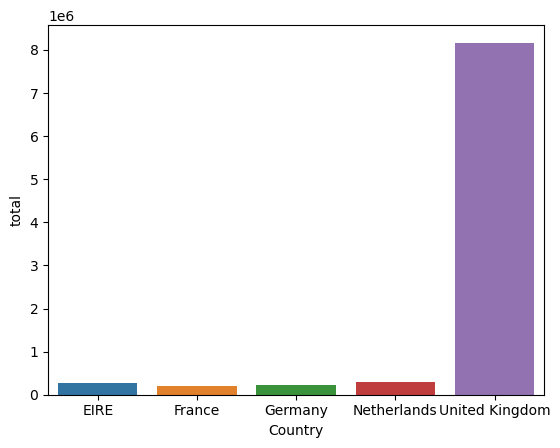

In [110]:
df_1=df[df["Country"].isin(top_5_c.index)]
df_2= df_1.groupby(["Country"]).agg(total=("total", "sum"))
df_2 = df_2.reset_index()
sns.barplot(x= "Country", y= "total", data = df_2);

In [111]:
# Top 5 products with highest unit price

df_1= df[(df.UnitPrice>0.01)&(df.StockCode!="AMAZONFEE")&(df.StockCode!="M")&(df.StockCode!="DOT")&(df.StockCode!="B")&(df.StockCode!="D")&(df.InvoiceNo.str.startswith("C") == False)&(df.StockCode!="POST")]

In [112]:
df_1.groupby(["StockCode"])[["UnitPrice"]].max().sort_values(by="UnitPrice", ascending= False).head(6)

,UnitPrice
StockCode,
22502,649.5
22655,295.0
22656,295.0
22826,195.0
22827,165.0
22828,165.0


In [113]:
# try it with numeric stock codes
df1= df[df.StockCode.str.isnumeric()]

In [114]:
df2=df1.groupby(["StockCode"])[["UnitPrice"]].max().sort_values(by="UnitPrice", ascending= False).head(6)
df2

,UnitPrice
StockCode,
22502,649.5
22656,295.0
22655,295.0
22826,195.0
22827,165.0
22828,165.0


In [115]:
# let's visualize it

<AxesSubplot:xlabel='StockCode', ylabel='UnitPrice'>

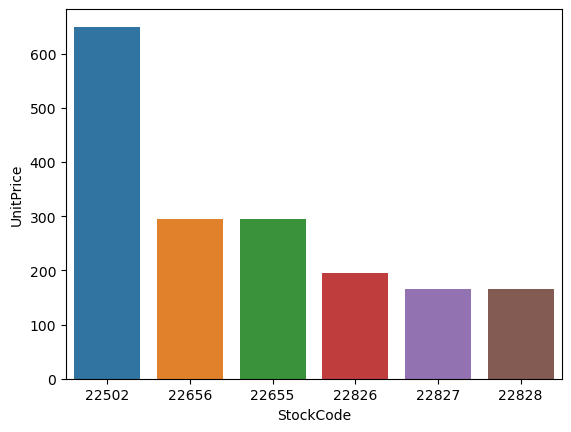

In [116]:
df2 = df2.reset_index()
sns.barplot(x= "StockCode", y= "UnitPrice", data = df2)

In [117]:
# Which country spends the least?
# again with stock code numeric ones

In [118]:
df1= df[df.StockCode.str.isnumeric()]
df1.groupby(["Country"])[["total"]].sum().sort_values(by="total", ascending=True).head(1)

,total
Country,
Saudi Arabia,131.17


In [119]:
# How many people in Spain spends less than Spain avg

In [120]:
df2= df1[df1.Country=="Spain"]

In [121]:
df2.groupby(["CustomerID"])[["total"]].sum().mean()

total    1328.739333
dtype: float64

In [122]:
# customers having total spending more than Spain avg (mtsa)
mtsa= df2.groupby(["CustomerID"])[["total"]].sum()>df2.groupby(["CustomerID"])[["total"]].sum().mean()

In [123]:
mtsa[mtsa.total==True].count()

total    6
dtype: int64

In [124]:
# total order cost by customer

In [125]:
df.groupby(["CustomerID"])[["total"]].sum()

,total
CustomerID,
12346.0,0.00
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,176.60


In [126]:
# average order cost by customer

In [127]:
t= df.groupby(["CustomerID","InvoiceNo"])[["total"]].sum()
t

total
CustomerID InvoiceNo          
12346.0    541431     77183.60
           C541433   -77183.60
12347.0    537626       711.79
           542237       475.39
           549222       636.25
...                        ...
18283.0    579673       220.31
           580872       208.00
18287.0    554065       765.28
           570715      1001.32
           573167        70.68

[22188 rows x 1 columns]

In [128]:
t.groupby(["CustomerID"])[["total"]].mean()

,total
CustomerID,
12346.0,0.000000
12347.0,615.714286
12348.0,449.310000
12349.0,1757.550000
12350.0,334.400000
...,...
18280.0,180.600000
18281.0,80.820000
18282.0,58.866667


In [129]:
# average order count by month

In [130]:
# first create month column
df["Month"]= df["InvoiceDate"].dt.month

In [131]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


In [132]:
# order quantity per month (oqpm)
oqpm=df.groupby(["Month"])[["InvoiceNo"]].count()
oqpm

,InvoiceNo
Month,
1,34900
2,27479
3,36439
4,29701
5,36782
6,36607
7,39267
8,35064
9,49861


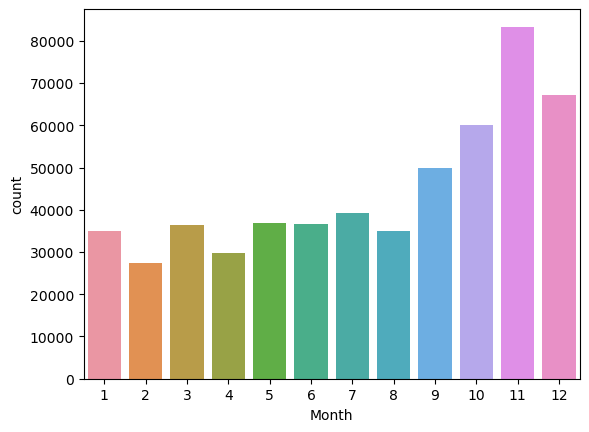

In [133]:
# visualize this result
sns.countplot(x= df.Month, data=df);

In [134]:
# lets try with stock code numerics

In [135]:
df1= df[df.StockCode.str.isnumeric()]

In [136]:
# monthly order count;  m_c
m_c=df1.groupby(["Month"])[["InvoiceNo"]].count()
m_c

,InvoiceNo
Month,
1,29563
2,24210
3,32141
4,26323
5,33075
6,32911
7,34902
8,31645
9,45528


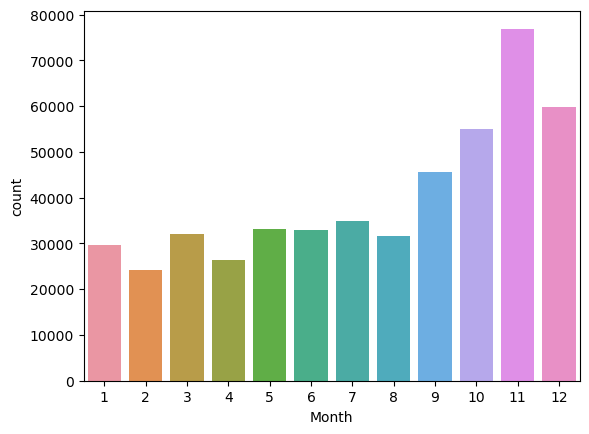

In [137]:
sns.countplot(x= df1.Month, data=df1);

In [138]:
# total cost per month
df1.groupby(["Month"])[["total"]].sum()

,total
Month,
1,493677.05
2,444893.18
3,609990.97
4,432720.14
5,660622.73
6,625901.67
7,606528.61
8,637792.04
9,941346.51


In [139]:
df.InvoiceDate.min()

Timestamp('2010-12-01 08:26:00')

In [140]:
df.InvoiceDate.max()

Timestamp('2011-12-09 12:50:00')

In [141]:
# Change Invoice date data type to Datetime and assign it to a new column named InvoiceDate2

In [142]:
# This has allready done before but at the same column, now do it again but this time on a new column
# so reload the data

In [143]:
df_21= pd.read_csv("vam2proje.csv", encoding= 'unicode_escape')
df_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [144]:
# delete duplicated values first
df_21.drop_duplicates(keep="first", inplace= True)

In [145]:
# assign a new column
df_21["InvoiceDate2"]=pd.to_datetime(df["InvoiceDate"])

In [146]:
df_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     536641 non-null  object        
 1   StockCode     536641 non-null  object        
 2   Description   535187 non-null  object        
 3   Quantity      536641 non-null  int64         
 4   InvoiceDate   536641 non-null  object        
 5   UnitPrice     536641 non-null  float64       
 6   CustomerID    401604 non-null  float64       
 7   Country       536641 non-null  object        
 8   InvoiceDate2  536639 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 40.9+ MB


In [147]:
df_21.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate2
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00


In [148]:
# take the date info only and assign to a new column named date

In [149]:
# first delete the 2 null values

In [150]:
df_21.dropna(subset="InvoiceDate2", inplace=True)

In [151]:
# check
df_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536639 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     536639 non-null  object        
 1   StockCode     536639 non-null  object        
 2   Description   535185 non-null  object        
 3   Quantity      536639 non-null  int64         
 4   InvoiceDate   536639 non-null  object        
 5   UnitPrice     536639 non-null  float64       
 6   CustomerID    401602 non-null  float64       
 7   Country       536639 non-null  object        
 8   InvoiceDate2  536639 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 40.9+ MB


In [152]:
df_21["Date"]= [i.strftime("%x") for i in df_21["InvoiceDate2"]]

In [153]:
df_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536639 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     536639 non-null  object        
 1   StockCode     536639 non-null  object        
 2   Description   535185 non-null  object        
 3   Quantity      536639 non-null  int64         
 4   InvoiceDate   536639 non-null  object        
 5   UnitPrice     536639 non-null  float64       
 6   CustomerID    401602 non-null  float64       
 7   Country       536639 non-null  object        
 8   InvoiceDate2  536639 non-null  datetime64[ns]
 9   Date          536639 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 45.0+ MB


In [154]:
# change date column also as datetime
df_21.Date= pd.to_datetime(df_21.Date)

In [155]:
df_21.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate2,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01


In [156]:
# delete permanently the columns InvoiceDate2 and date

In [157]:
df_21.drop(["InvoiceDate", "InvoiceDate2"], axis = 1, inplace= True)

In [158]:
df_21.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01


In [159]:
# find which month is the month with highest spending

In [160]:
df_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536639 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536639 non-null  object        
 1   StockCode    536639 non-null  object        
 2   Description  535185 non-null  object        
 3   Quantity     536639 non-null  int64         
 4   UnitPrice    536639 non-null  float64       
 5   CustomerID   401602 non-null  float64       
 6   Country      536639 non-null  object        
 7   Date         536639 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


In [161]:
df_21["Month"]= df_21.Date.dt.month

In [162]:
df_21.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,12
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,12


In [163]:
df_21["total"]= df_21.Quantity * df_21.UnitPrice

In [164]:
df_21.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Month,total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,12,20.34


In [165]:
# prepare the data first
df_21= df_21[(df_21.UnitPrice>0.01)&(df_21.StockCode!="AMAZONFEE")&(df_21.StockCode!="M")&(df_21.StockCode!="B")&(df_21.StockCode!="D")&(df_21.StockCode!="POST")&(df_21.StockCode!="DOT")]

In [166]:
# monthly spendings
df_21.groupby(["Month"])[["total"]].sum().sort_values(by="total")

,total
Month,
4,482122.91
2,497977.21
1,578029.26
7,677373.51
3,679587.09
6,684362.23
8,700206.87
5,730509.63
9,1010791.04


In [167]:
# November is the month with highest spending

In [168]:
months= df_21.groupby(["Month"])[["total"]].sum()

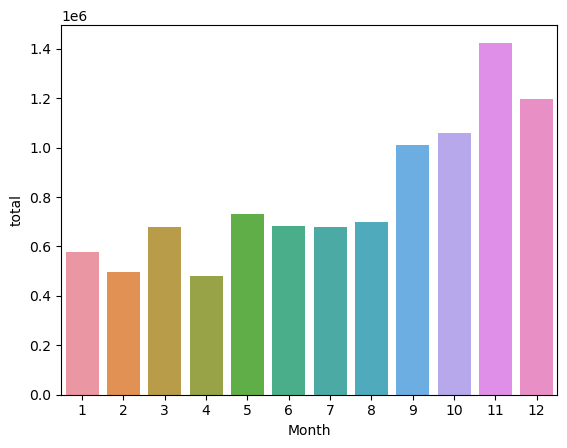

In [169]:
sns.barplot(x=months.index, y= "total", data= months);

In [170]:
# Find the outliers for price and visualize before and after

In [171]:
df= pd.read_csv("vam2proje.csv", encoding= 'unicode_escape')

In [172]:
# prepare the data first
# price will be higher than 0.001, stock code will not be like  amazonfee, dot, post etc

In [173]:
df=df[(df.UnitPrice>0.001)&(df.StockCode!="AMAZONFEE")&(df.Description.str.endswith("POSTAGE")==False)&(df.StockCode!="B")&(df.StockCode!="POST")&(df.StockCode!="M")&(df.StockCode!="DOT")&(df.InvoiceNo.str.startswith("C") == False)]

In [174]:
df.drop_duplicates(keep="first", inplace= True)

In [175]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


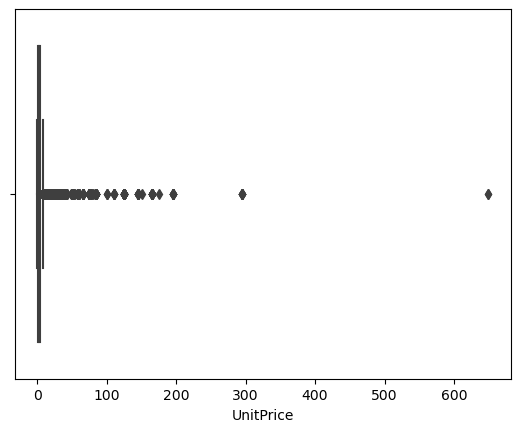

In [176]:
sns.boxplot(x=df["UnitPrice"]);

In [177]:
# lets analyse unit price
df.UnitPrice.describe()

count    522723.000000
mean          3.287992
std           4.465104
min           0.040000
25%           1.250000
50%           2.080000
75%           4.130000
max         649.500000
Name: UnitPrice, dtype: float64

In [178]:
Q1= np.percentile(df.UnitPrice, 25)
Q1

1.25

In [179]:
Q3= np.percentile(df.UnitPrice, 75)
Q3

4.13

In [180]:
# Q1 and Q3 values are consistent with the query results of  (df.UnitPrice.describe())

In [181]:
IQR =  Q3 - Q1
IQR

2.88

In [182]:
# when checked the garph, 2 *IQR seems logical, even Q3 is 4.13, especially values up to 100 are also not few

In [183]:
upper_limit = Q3 + 2*IQR
upper_limit

9.89

In [184]:
lower_limit = Q1 - 2*IQR
lower_limit

-4.51

In [185]:
# lower limit will be taken "0", high values will be limited by upper_limit

In [186]:
df.UnitPrice=df[df.UnitPrice<upper_limit].UnitPrice

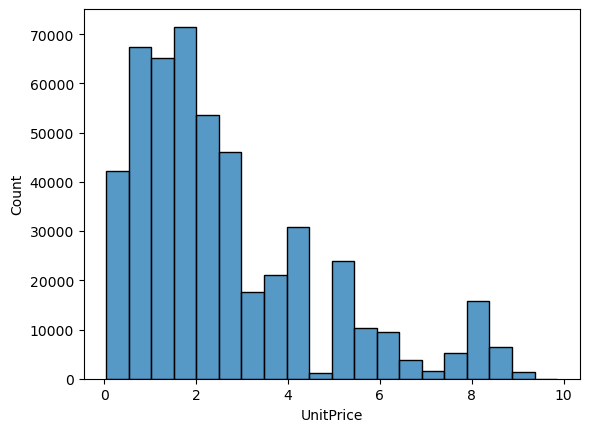

In [187]:
sns.histplot(data=df, x="UnitPrice", bins= 20); 